In [3]:
# Import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Read file
spotify = pd.read_csv("dataset.csv")
print(spotify.head())

   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


In [5]:
# Delete missing value
pd.isnull(spotify).sum()
spotify.info()
spotify = spotify.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [6]:
# Check and delete the duplicate rows
duplicateID = spotify[spotify.duplicated(subset=['track_id'])]
clear_duplicate = spotify.drop_duplicates(subset="track_id", keep='first', inplace=False)
clear_duplicate.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,89740.0,53479.005739,33410.141924,0.000,23766.75000,50680.500000,80618.500000,113999.000
popularity,89740.0,33.198808,20.580640,0.000,19.00000,33.000000,49.000000,100.000
duration_ms,89740.0,229144.365578,112945.780336,8586.000,173040.00000,213295.500000,264293.000000,5237295.000
danceability,89740.0,0.562166,0.176692,0.000,0.45000,0.576000,0.692000,0.985
energy,89740.0,0.634458,0.256606,0.000,0.45700,0.676000,0.853000,1.000
key,89740.0,5.283530,3.559912,0.000,2.00000,5.000000,8.000000,11.000
loudness,89740.0,-8.498994,5.221518,-49.531,-10.32225,-7.185000,-5.108000,4.532
mode,89740.0,0.636973,0.480875,0.000,0.00000,1.000000,1.000000,1.000
speechiness,89740.0,0.087442,0.113278,0.000,0.03600,0.048900,0.085900,0.965
acousticness,89740.0,0.328285,0.338321,0.000,0.01710,0.188000,0.625000,0.996


In [7]:
# Sort the popularity with more than 95 scores in descending order
popular_song = clear_duplicate.query('popularity>=95', inplace=False).sort_values('popularity', ascending=False)
popular_song[:10]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,dance
51664,51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,...,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,4,hip-hop
20008,20008,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,...,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,dance
67356,67356,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,...,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,latin
67358,67358,6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,Me Porto Bonito,97,178567,True,0.911,0.712,...,-5.105,0,0.0817,0.09010,0.000027,0.0933,0.425,92.005,4,latin
67359,67359,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Un Verano Sin Ti,Tití Me Preguntó,97,243716,False,0.650,0.715,...,-5.198,0,0.2530,0.09930,0.000291,0.1260,0.187,106.672,4,latin
20000,20000,5IgjP7X4th6nMNDh4akUHb,Chris Brown,Indigo (Extended),Under The Influence,96,184613,True,0.733,0.690,...,-5.529,0,0.0427,0.06350,0.000001,0.1050,0.310,116.992,4,dance
67559,67559,5Eax0qFko2dh7Rl2lYs3bx,Bad Bunny,Un Verano Sin Ti,Efecto,96,213061,False,0.801,0.475,...,-8.797,0,0.0516,0.14100,0.000017,0.0639,0.234,98.047,4,latin
79000,79000,4h9wh7iOZ0GGn8QVp4RAOB,OneRepublic,I Ain’t Worried (Music From The Motion Picture...,I Ain't Worried,96,148485,False,0.704,0.797,...,-5.927,1,0.0475,0.08260,0.000745,0.0546,0.825,139.994,4,piano
67500,67500,3k3NWokhRRkEPhCzPmV8TW,Bad Bunny;Bomba Estéreo,Un Verano Sin Ti,Ojitos Lindos,95,258298,False,0.647,0.686,...,-5.745,0,0.0413,0.08000,0.000001,0.5280,0.268,79.928,4,latin


In [31]:
# Sort the popularity and genre to determine the most popular genres.
popular_genre = clear_duplicate.groupby([clear_duplicate['track_genre']])['popularity'].mean().sort_values(ascending=False)
popular_genre[:10]

track_genre
k-pop       59.423581
pop-film    59.096933
metal       56.422414
chill       53.738683
latino      51.788945
sad         51.109929
grunge      50.587007
indian      49.765348
anime       48.776884
emo         48.500000
Name: popularity, dtype: float64

In [37]:
# Calculate the average popularity for each genre and sorts them in descending order. 
avg_popularity_genre= clear_duplicate.groupby('track_genre')['popularity'].mean()
avg_popularity_genre_sorted = avg_popularity_genre.sort_values(ascending=False)
most_popular_genres = avg_popularity_genre_sorted.head(10)

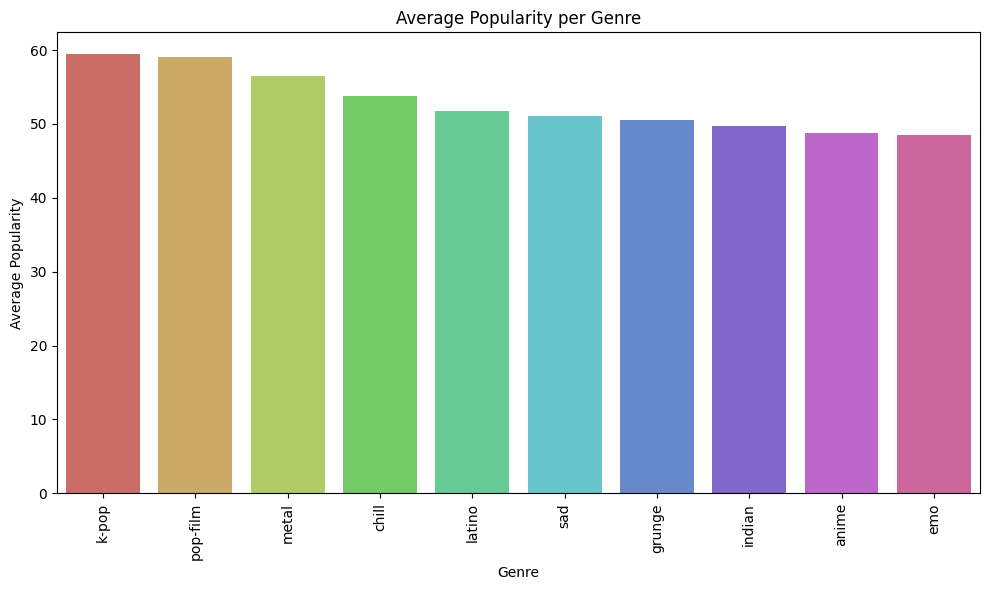

In [38]:
# Histogram showing the average popularity per genre
plt.figure(figsize=(10,6))
sns.barplot(x=most_popular_genres.index, y=most_popular_genres.values, palette="hls")
plt.title("Average Popularity per Genre")
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

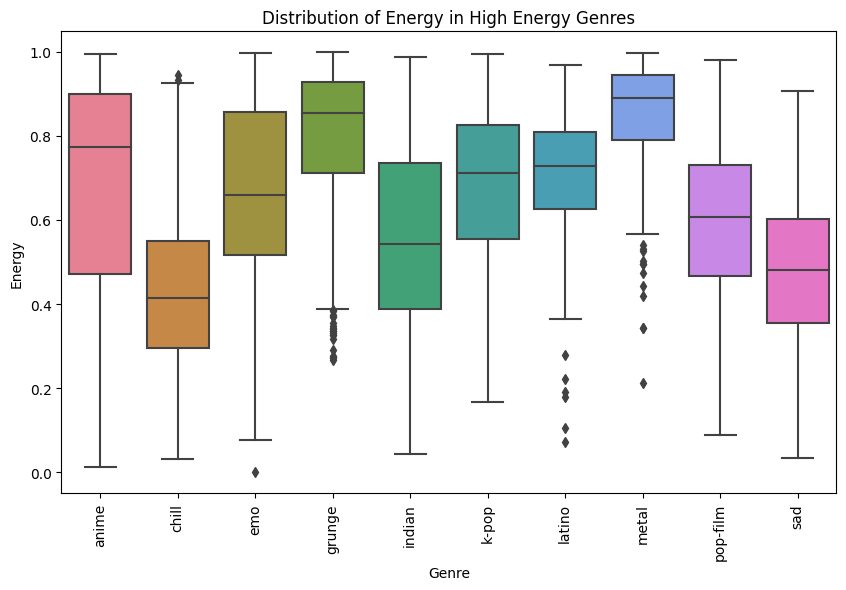

In [49]:
# Energy distribution in different genres 
high_energy_genres = top_genres.head(10)  # Select the top 10 genres with highest popularity

plt.figure(figsize=(10, 6))

# Box plot or violin plot for high energy genres
sns.boxplot(x=clear_duplicate[clear_duplicate['track_genre'].isin(high_energy_genres.index)]['track_genre'], y='energy', data=clear_duplicate, palette="husl")
plt.title("Distribution of Energy in High Energy Genres")
plt.xlabel("Genre")
plt.ylabel("Energy")
plt.xticks(rotation=90)


plt.show()

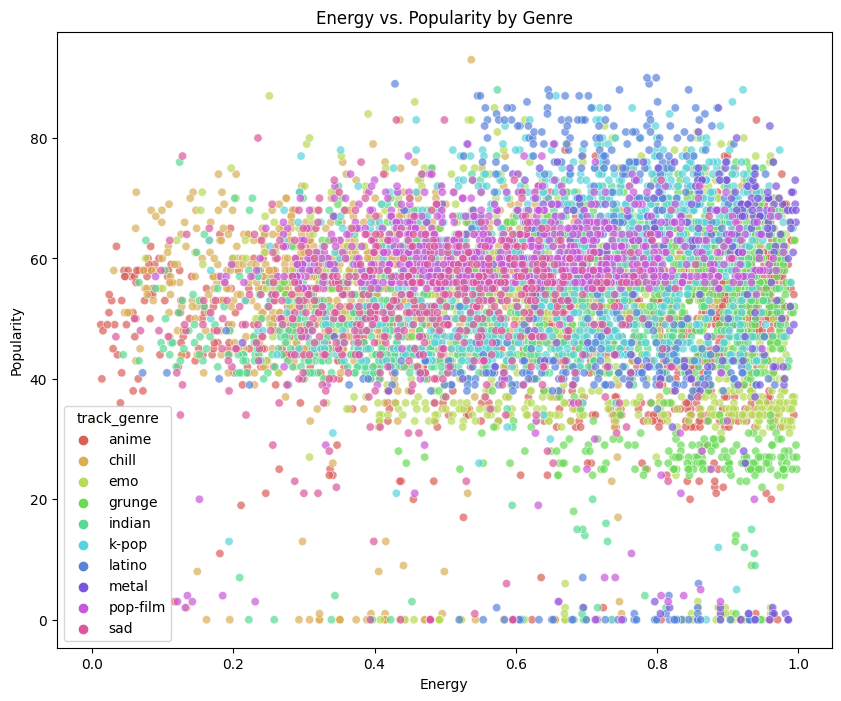

In [28]:
# Correlation between energy and popularity
plt.figure(figsize=(10, 8))
sns.scatterplot(x='energy', y='popularity', hue='track_genre', data=clear_duplicate[clear_duplicate['track_genre'].isin(top_genres.index)], alpha=0.7, palette='hls')
plt.title("Energy vs. Popularity by Genre")
plt.xlabel("Energy")
plt.ylabel("Popularity")
plt.show()